#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


In [ ]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import seaborn as sns
import pandas as pd # pandas
import numpy as np # numpy
import time
import matplotlib.pyplot as plt
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [ ]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [ ]:
_ROOT = "/content/drive/MyDrive/Intro ML/Week 1"


df = read_dataset(os.path.join(_ROOT, "final_house_loan.csv"))
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


## Data Analysis

In [ ]:
# Data analysis
# Todo: analyze your data here
import math
import matplotlib.pyplot as plt

def visualize_data(df):
  print(f"min:{df.min()} - max:{df.max()}")
  bins_calculate = round(1 + 3.322 * math.log(len(df)))
  print(f'bins ={bins_calculate}')
  df.hist(bins=bins_calculate)


min:18 - max:65
bins =37


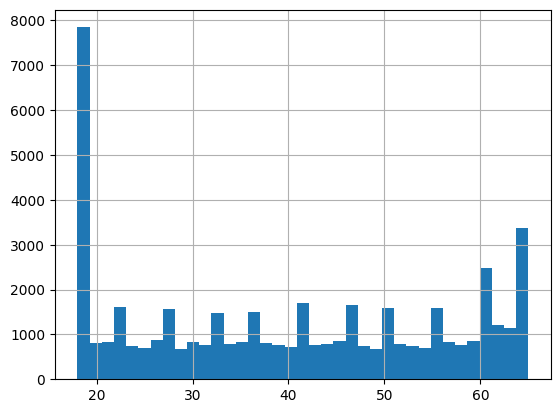

In [ ]:
#Visualize "Age" column
visualize_data(df['Age'])


min:372.7 - max:54662.75
bins =37


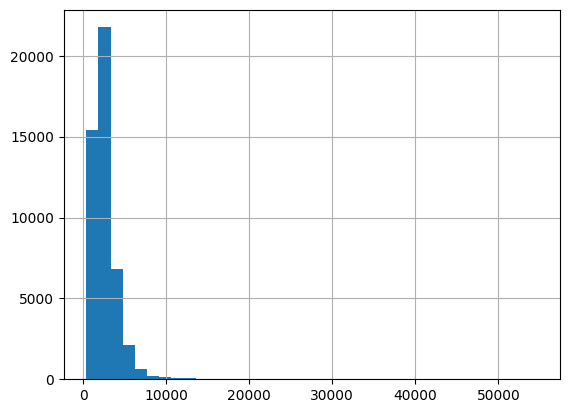

In [ ]:
#Visualize "Income (USD)" column
visualize_data(df['Income (USD)'])

min:7859.62 - max:1077966.73
bins =37


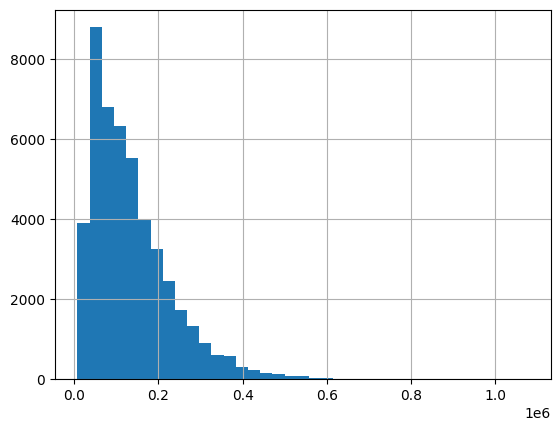

In [ ]:
#Visualize "Property Price" column
visualize_data(df['Property Price'])

min:254.5865784531561 - max:366131.1652175723
bins =37


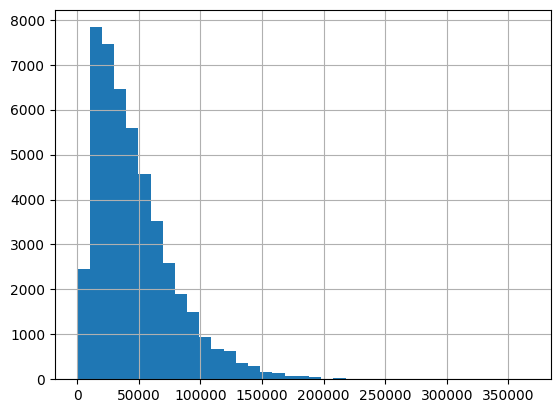

In [ ]:
#Visualize "Loan Sanction Amount (USD)" column
visualize_data(df['Loan Sanction Amount (USD)'])

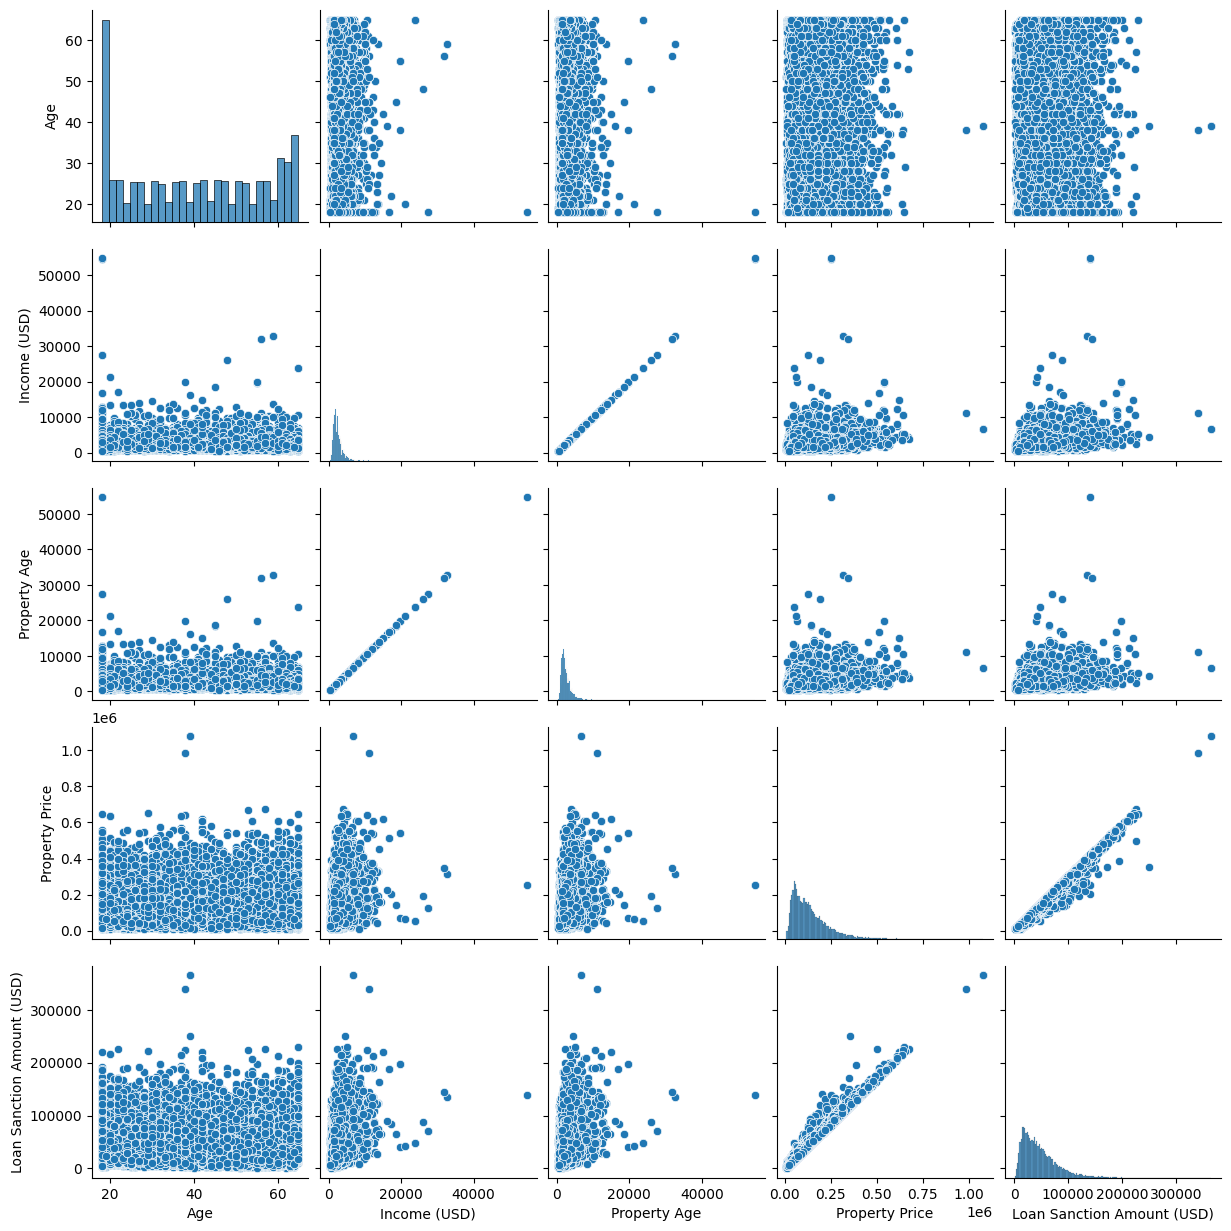

In [ ]:
# Create pairwise scatterplots of dataset
sns.pairplot(df)

## Preprocessing

In [ ]:
#Check null
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [ ]:
#Check duplicate
df.duplicated().unique()

array([False])

In [ ]:
def preprocessing_data(df):
    df = df.dropna()
    return df

In [ ]:
#Apply preprocessing_data
df = preprocessing_data(df.copy())
#Check again
df.isnull().sum()

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64

In [ ]:
#Check unique
print(df['Gender'].unique())
print(df['Income Stability'].unique())
print(df['Property Location'].unique())

['F' 'M']
['Low' 'High']
['Rural' 'Urban' 'Semi-Urban']


## Feature Engineering

In [ ]:


start_time = time.time()
normalized_data = df.copy()
# data normalization
normalized_data["Gender"] = normalized_data["Gender"].apply(lambda x: 0 if x=="M" else 1)
normalized_data["Income Stability"] = normalized_data["Income Stability"].apply(lambda x:0 if x=="Low" else 1)
normalized_data["Property Location"] = normalized_data['Property Location'].apply(lambda x: 0 if x=="Rural" else 1 if x=="Rural" else 2 if x=="Semi-Urban"else 3 )

display(normalized_data.head())
display(normalized_data.corr())
print("Running time", time.time() - start_time)



,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,1,19,1641.25,0,1651.25,0,59641.82,21026.420753
1,0,29,1989.71,0,1990.71,3,179858.51,60595.183366
2,1,37,1849.91,0,1856.91,0,117297.62,39181.648002
3,0,65,2735.18,1,2747.18,0,354417.72,128497.710865
4,1,62,4741.78,1,4740.78,3,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,-0.007706,0.002445,-0.019000,0.002512,-0.009359,-0.005931,-0.003396
Age,-0.007706,1.000000,-0.044086,0.455855,-0.044085,-0.005409,-0.003274,-0.000115
Income (USD),0.002445,-0.044086,1.000000,-0.080961,0.999986,0.000729,0.358110,0.392897
Income Stability,-0.019000,0.455855,-0.080961,1.000000,-0.081008,0.003493,-0.004813,0.070969
Property Age,0.002512,-0.044085,0.999986,-0.081008,1.000000,0.000698,0.358110,0.392892
Property Location,-0.009359,-0.005409,0.000729,0.003493,0.000698,1.000000,-0.001005,-0.002553
Property Price,-0.005931,-0.003274,0.358110,-0.004813,0.358110,-0.001005,1.000000,0.994429
Loan Sanction Amount (USD),-0.003396,-0.000115,0.392897,0.070969,0.392892,-0.002553,0.994429,1.000000


Running time 0.22611784934997559


<Axes: >

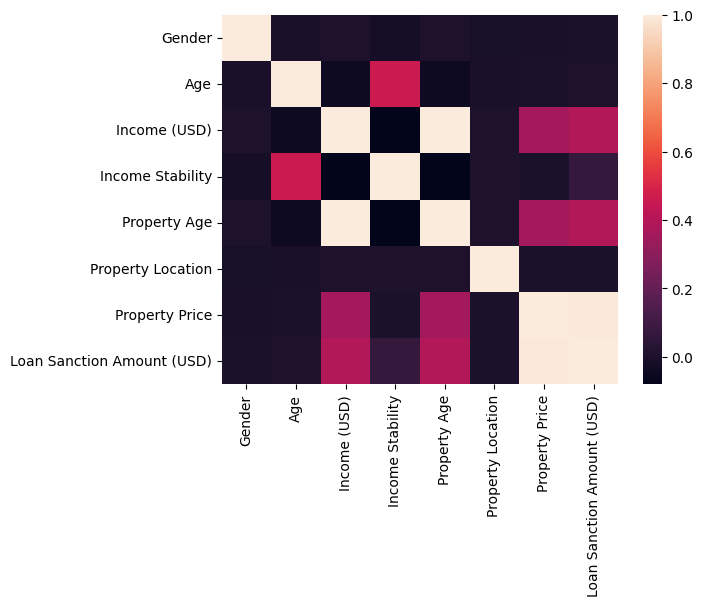

In [ ]:
import seaborn as sns
sns.heatmap(normalized_data.corr())

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()     # Columns name
    columns.remove('Loan Sanction Amount (USD)')
    X = df[columns]
    y = df['Loan Sanction Amount (USD)']
    return X, y

X, y = prepare_X_y(normalized_data)

In [ ]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)# Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [ ]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
MAE_LinearRegression_Train  = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", MAE_LinearRegression_Train )
pred = model.predict(testX)
MAE_LinearRegression_Test = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", MAE_LinearRegression_Test)

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  156.58446370509566
mean absolute error of linear model on test set  130.4046561144933
[ 2.34130728e+02 -7.93888242e+01  5.67213804e-01  1.11434686e+04
  4.57535151e-01 -5.40349657e+01  3.36338888e-01]

548.6953511761312


In [ ]:
from sklearn import linear_model


def build_lasso_model(X, y):
    model = linear_model.Lasso(fit_intercept=True)
    model.fit(X,y)

    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
MAE_Lasso_Train = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", MAE_Lasso_Train )
pred = model.predict(testX)
MAE_Lasso_Test = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", MAE_Lasso_Test)

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_
print()


mean absolute error of linear model on train set  157.1325291898121
mean absolute error of linear model on test set  130.93025107392586
[ 2.30048402e+02 -7.92570662e+01  8.56570653e-01  1.11273484e+04
  1.68015380e-01 -5.34028144e+01  3.36339704e-01]

546.155861988962



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.874e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import Ridge


def build_ridge_model(X, y):
    model = Ridge(fit_intercept=True)
    model.fit(X,y)

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
MAE_Ridge_Train = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", MAE_Ridge_Train)
pred = model.predict(testX)
MAE_Ridge_Test = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", MAE_Ridge_Test )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  156.75038175649811
mean absolute error of linear model on test set  130.5530762997648
[ 2.34060113e+02 -7.93465160e+01  5.68529639e-01  1.11381557e+04
  4.56155192e-01 -5.40289380e+01  3.36339207e-01]

547.6203786879632


In [ ]:
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model = ElasticNet(fit_intercept=True)
    model.fit(X,y)

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)
MAE_ElasticNet_Train = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ",  MAE_ElasticNet_Train)
pred = model.predict(testX)
MAE_ElasticNet_Test = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ",  MAE_ElasticNet_Test)

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  1747.688469263263
mean absolute error of linear model on test set  1741.6311829107833
[ 5.11186887e+01 -6.51006207e-01  9.43371468e-01  1.25272974e+03
 -3.81104827e-02 -3.36092722e+01  3.36931116e-01]

-1440.3327139287503


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+11, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


#Comparing MAE

##On train set

[Text(0.5, 0, 'MAE on train set (smaller is better)')]

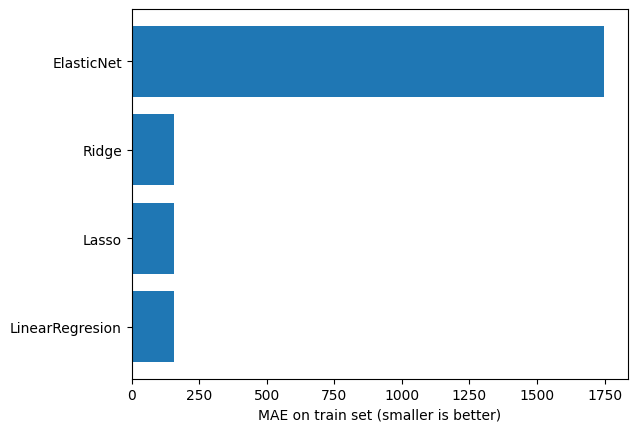

In [ ]:
x = ['LinearRegresion', 'Lasso', 'Ridge', 'ElasticNet']
y = [MAE_LinearRegression_Train,MAE_Lasso_Train, MAE_Ridge_Train,MAE_ElasticNet_Train]

fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.8)
ax.set(xlabel="MAE on train set (smaller is better)")


##On test set

[Text(0.5, 0, 'MAE on test set (smaller is better)')]

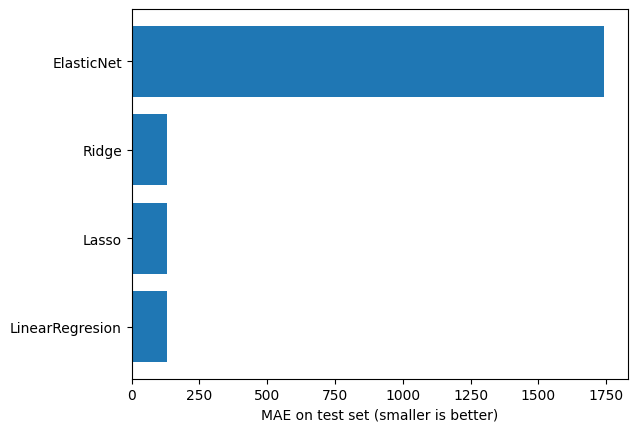

In [ ]:
x = ['LinearRegresion', 'Lasso', 'Ridge', 'ElasticNet']
y = [MAE_LinearRegression_Test,MAE_Lasso_Test, MAE_Ridge_Test,MAE_ElasticNet_Test]

fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.8)
ax.set(xlabel="MAE on test set (smaller is better)")

#Conclusion

Based on MAE score on train and test set. We can conclude that with this dataset, model Linear Regression gives the best results (156.5844 for training and 130.5530 for testing). In all these cases, we see that the MAE score for the training set is higher than for the test set. This may be caused by several reasons:

1.It is possible when your test data is small and its not a good representative of train data, then there may or may not be a case when for that test data it behaves good and gives low error.

2.There can be a case when you use regularization and your train data move away from overfitting i.e. increased train error but generalizing good on test data i.e. low train error.



## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [ ]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y,ord):
    poly_model = make_pipeline(PolynomialFeatures(ord, include_bias=False), LinearRegression())
    poly_model.fit(X, y)

    return poly_model


poly_model = build_pipeline(trainX, trainY,2)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  159.92392945606255
mean absolute error of linear model (with poly transform) on test set  134.06719568454858


In [ ]:
poly_model = build_pipeline(trainX, trainY,3)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  304.5324801161618
mean absolute error of linear model (with poly transform) on test set  283.3500472374998


In [ ]:
poly_model = build_pipeline(trainX, trainY,4)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  2067.8503803321137
mean absolute error of linear model (with poly transform) on test set  2070.4109199665777


In [ ]:
poly_model = build_pipeline(trainX, trainY,5)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  5962.745459974529
mean absolute error of linear model (with poly transform) on test set  5890.335251890122


In [ ]:
poly_model = build_pipeline(trainX, trainY,6)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  12614.729569709996
mean absolute error of linear model (with poly transform) on test set  13928.998882348658


#Conclusion

Choosing a high n order can lead to overfitting, making the model perform well on training data but poorly on unseen data and becoming difficult to interpret.

